# Métricas para regresión

##### Cookbook [@data_mining_2020_1](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020_1/blob/master/README.ipynb)

## Resources

* [Choosing the Right Metric for Evaluating Machine Learning Models — Part 1](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4)
* [Comprehensive Confidence Intervals for Python Developers](https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers)
* [Gradient and directional derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient)
* [Gradient Descent Derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)

## Recipe 

![imagen.png](https://miro.medium.com/max/1400/1*1WPbfzztdv50V22TpA6njw.png)
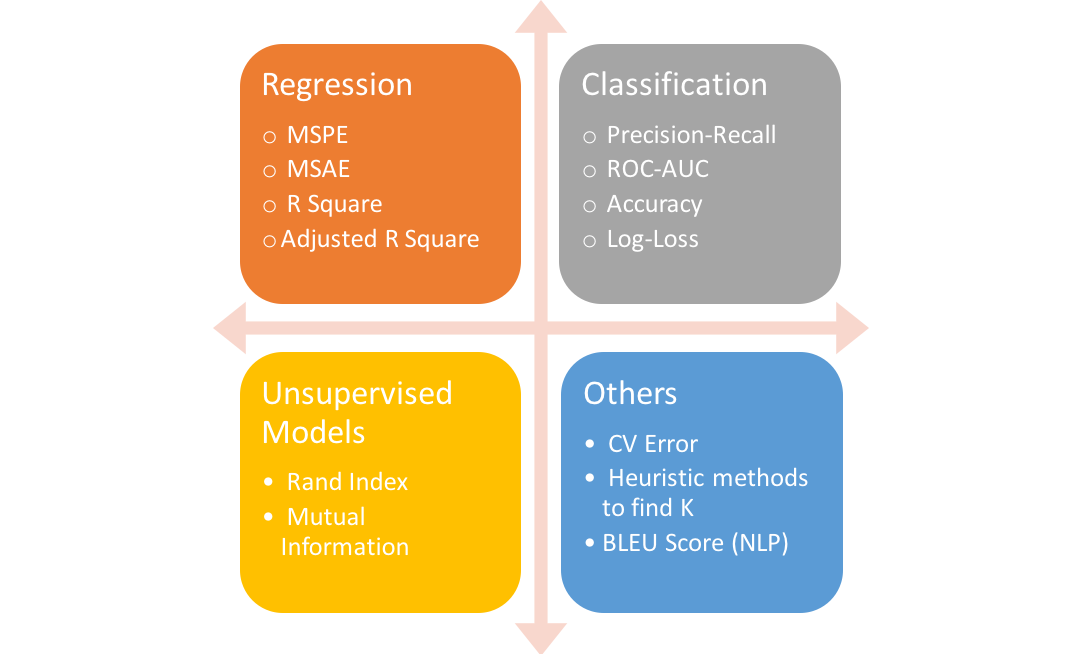

### RMSE (Root Mean Square Error)

RMSE representa la desviación estándar de las diferencias entre los valores predichos y los valores observados (llamados residuales). Matemáticamente, se calcula mediante esta fórmula:
![imagen.png](https://miro.medium.com/max/654/1*pQR9id8CtnsdKljm8KODuw.png)
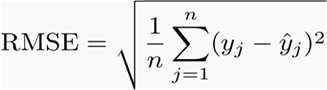

### MAE
MAE es el promedio de la diferencia absoluta entre los valores predichos y los valores observados.  MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. Por ejemplo, la diferencia entre 10 y 0 será el doble de la diferencia entre 5 y 0. Matemáticamente, se calcula mediante esta fórmula:

![imagen.png](https://miro.medium.com/max/630/1*iLabSjpdwd1TaZyKdDKYBA.png)

### Entonces, ¿cuál debería elegir y por qué?

Bueno, es fácil de entender e interpretar el MAE porque toma directamente el promedio de las compensaciones, mientras que el RMSE penaliza la diferencia más alta más que el MAE.

Entendamos la afirmación anterior con los dos ejemplos:

> Caso 1: Valores reales  $y = [2,4,6,8]$ , Valores predichos $\hat{y}= [4,6,8,10]$

> Caso 2: Valores reales $y = [2,4,6,8]$ , Valores predichos $\hat{y}= [4,6,8,12]$

> Para el caso $MAE = 2.0$, y $RMSE = 2.0$

> Para el caso $MAE = 2.5$, y $RMSE = 2.65$

A partir del ejemplo anterior, podemos ver que RMSE penaliza la última predicción de valor más fuertemente que MAE. En general, RMSE será mayor o igual que MAE. El único caso en que es igual a MAE es cuando todas las diferencias son iguales o nulas (verdadero para el caso 1, en el que la diferencia entre el valor real y el previsto es 2 para todas las observaciones).

RMSE sigue siendo la métrica por defecto de muchos modelos porque la función de pérdida (*loss function*) definida en términos de RMSE es fácilmente diferenciable y facilita la realización de operaciones matemáticas.

Tomemos un modelo lineal simple en una variable: $y = mx+b$. Aquí, estamos tratando de encontrar $m$ y $b$ y se nos proporcionan los datos $(x,y)$. Si definimos la función de pérdida ($J$) en términos de $RMSE$: entonces podemos diferenciar fácilmente $J$ para obtener la $m$ y $b$ actualizada (así es como funciona el descenso de gradiente).

Gradiente descendente

![imagen.png](https://i.ytimg.com/vi/v0_LlyVquF8/maxresdefault.jpg)

![imagen.png](https://mccormickml.com/assets/GradientDescent/ThetaZeroDerivation.png)

![imagen.png](http://chrisjmccormick.files.wordpress.com/2014/02/simple2dgradientdescent.png)

[Gradient Descent Derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)
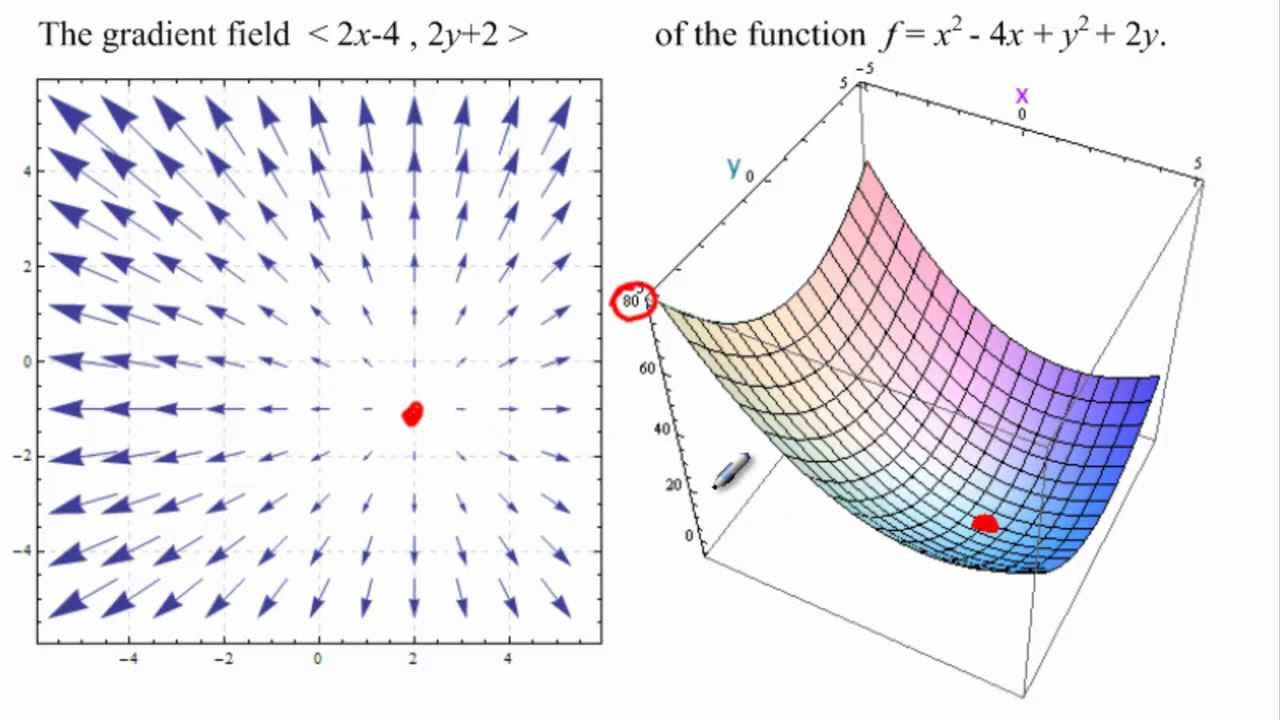

Sin embargo, si quieres una métrica sólo para comparar entre dos modelos desde el punto de vista de la interpretación, entonces creo que MAE es una mejor opción (por el valor absoluto). El rango de $RMSE$ & $MAE$ es de $[0, ∞]$. Una distinción importante entre MAE y RMSE, es que minimizar el error al cuadrado sobre un conjunto de números resulta en encontrar su **media**, y minimizar el error absoluto resulta en encontrar su **mediana**. Esta es la razón por la que MAE es robusto a los valores atípicos mientras que RMSE no lo es. Esta respuesta explica este concepto en detalle.

### R al cuadrado ($R²$)
R al cuadrado y ajustado R al cuadrado se utilizan a menudo porque explican lo bien que la(s) variable(s) independiente(s) seleccionada(s) explica(n) la variabilidad de su(s) variable(s) dependiente(s).

El numerador es MSE (*Mean Square Error*, promedio de los cuadrados de los residuos) y el denominador es la varianza en los valores de Y. Cuanto mayor es el MSE, menor es el R_cuadrado y más pobre es el modelo.
![imagen.png](https://miro.medium.com/max/1400/1*d7IVANCDovpXKP5N0rR2Yg.png)
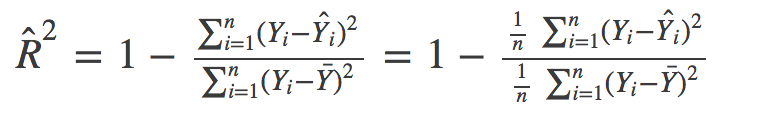

### R al cuadrado ajustado

Al igual que $R^2$, $R^2$ ajustado también muestra lo bien que los términos se ajustan a una curva o línea pero se ajusta al número de términos en un modelo. Está dado por la siguiente fórmula:

![](https://miro.medium.com/max/235/1*Hj0akOXAhx4UEhbRJjyHhw.png)

donde $n$ es el número total de observaciones y $k$ es el número de predictores. $R^2$ ajustado siempre será menor o igual que $R^2$.

¿Por qué debería elegir el $R^2$ ajustado sobre el $R^2$?
Hay algunos problemas con el $R^2$ normal que se resuelven con el $R^2$ ajustado. Un $R^2$ ajustado considerará la *mejora marginal* añadida por un término adicional en su modelo. Por lo tanto, aumentará si agrega los términos útiles y disminuirá si agrega predictores menos útiles. Sin embargo, $R^2$ aumenta con términos crecientes aunque el modelo no mejore realmente. Será más fácil entender esto con un ejemplo.

![imagen.png](https://miro.medium.com/max/1400/1*2dFBX0Vz3fWBnOrbrB05mg.png)

Aquí, el caso 1 es el caso simple en el que tenemos 5 observaciones de (x,y). En el caso 2, tenemos una variable más que es el doble de la variable 1 (perfectamente correlacionada con la var 1). En el caso 3, hemos producido una ligera perturbación en la var2 de tal manera que ya no está perfectamente correlacionada con la var1.

Por lo tanto, si ajustamos el modelo simple de mínimos cuadrados ordinarios (ordinary least squares, OLS) para cada caso, lógicamente no estamos proporcionando ninguna información extra o útil al caso 2 y al caso 3 con respecto al caso 1. Por lo tanto, nuestro valor métrico no debería mejorar para estos modelos. Sin embargo, en realidad no es cierto para R² que da un valor más alto para los modelos 2 y 3. Pero su R² ajustado se encarga de este problema y en realidad está disminuyendo para los casos 2 y 3. Demos algunos números a estas variables (x,y) y veamos los resultados obtenidos en Python.
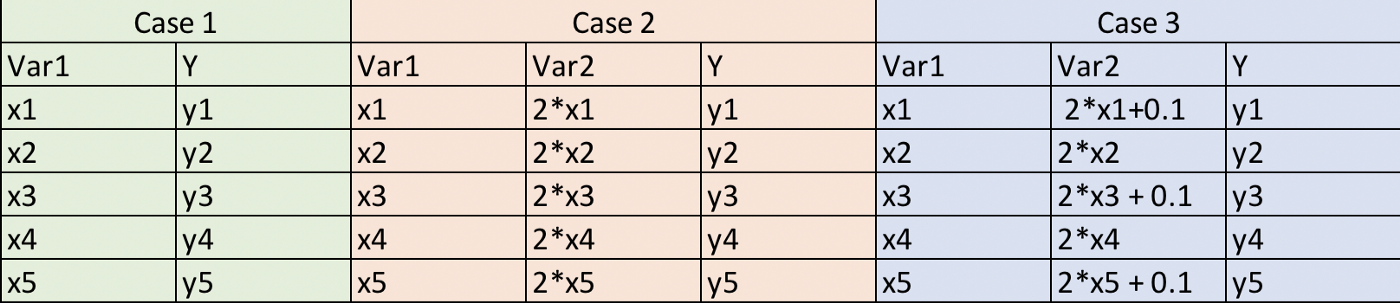

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## LOAD

In [3]:
df = pd.read_csv("../data/200418COVID19MEXICO_CLEAN_S.csv")
df.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,DIAS_SINTOMAS_INGRESO
0,2,9,15,1,15,15,37,2,2,1,...,2,2,2,2,2,2,2,2,1,12
1,2,12,9,1,15,9,3,1,97,2,...,2,2,2,2,1,2,2,2,2,14
2,2,9,28,2,16,28,32,1,97,2,...,2,2,2,2,2,2,2,1,1,2
3,2,12,9,2,9,9,13,1,97,2,...,2,2,2,2,2,2,2,1,3,2
4,1,3,15,2,15,15,106,1,97,2,...,2,2,2,2,1,2,2,1,3,2


In [4]:
df.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'DIAS_SINTOMAS_INGRESO'],
      dtype='object')

### FEATURE SELECTION

In [5]:
df_03 = pd.read_csv("../data/df_03.csv")
important = df_03[["feature", "importance"]].sort_values(by=["importance"]).head(10)
important

,feature,importance
0,HIPERTENSION,1
1,DIAS_SINTOMAS_INGRESO,2
3,SECTOR,3
4,RESULTADO,4
2,DIABETES,5
5,OTRO_CASO,6
7,ORIGEN,7
14,OBESIDAD,8
8,NEUMONIA,9
9,INTUBADO,10


In [6]:
X = df[important.feature]

y = df.EDAD

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [8]:
def metrics(m, X ,y):
    yhat = m.predict(X)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adj_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("r_squared: ", r_squared)
    print("adj_r_squared:", adj_r_squared)
    return r_squared, adj_r_squared

In [9]:
model_01 = linear_model.LinearRegression(normalize=True)
model_01.fit(X_train.astype("int64").values, y_train.astype("int64"))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
metrics(model_01, X_train.astype("int64"), y_train.astype("int64"))

r_squared:  0.2149769165000216
adj_r_squared: 0.2141618162160428


(0.2149769165000216, 0.2141618162160428)

In [11]:
metrics(model_01, X_test.astype("int64"), y_test.astype("int64"))

r_squared:  0.22770465828875308
adj_r_squared: 0.22750436903288251


(0.22770465828875308, 0.22750436903288251)

## TRANSFORM

In [12]:
target = ["EDAD"]

In [13]:
numeric = ["DIAS_SINTOMAS_INGRESO"]

In [14]:
binary_l = []
categorical_l = []

for column in df[list(important.feature.unique())]:
#    print("----------*----------*----------*----------*----------*----------*----------*----------")
#    print("Columna: ", column)
#    print("Número de valores únicos: ", df_copy[column].nunique())
#    print("Valores únicos: ", df_copy[column].unique())
#    print("Conteo de valores", df_copy[column].value_counts())
    if(df[column].nunique() == 2):
        binary_l.append(column)
        
    elif((df[column].nunique() > 2) & (column != "DIAS_SINTOMAS_INGRESO")):
        categorical_l.append(column)

In [15]:
binary_l

['HIPERTENSION', 'DIABETES', 'ORIGEN', 'OBESIDAD', 'NEUMONIA']

In [16]:
categorical_l

['SECTOR', 'RESULTADO', 'OTRO_CASO', 'INTUBADO']

### Transform `categorical`

In [17]:
dummy =  pd.get_dummies(data = df["SEXO"], columns=["SEXO"], prefix_sep='_', prefix="SEXO_cat_")
dummy.head()

,SEXO_cat__1,SEXO_cat__2
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [18]:
df_copy = df[categorical_l].copy()

In [19]:
df_copy["target"] = df[target]

In [20]:
df_copy.shape

(48212, 5)

In [21]:
for column in df_copy[categorical_l]:
    #print(pd.get_dummies(df_copy[column], prefix_sep='_cat').head())
    dummy =  pd.get_dummies(data = df[column], columns=[column], prefix_sep='_', prefix = str(column))
    df_copy = pd.concat((df_copy, dummy), axis=1)
    df_copy.drop(labels=column, axis=1, inplace=True)

In [22]:
df_copy.shape

(48212, 23)

In [23]:
df_copy.head()

,target,SECTOR_1,SECTOR_2,SECTOR_3,SECTOR_4,SECTOR_5,SECTOR_6,SECTOR_7,SECTOR_8,SECTOR_9,...,SECTOR_13,RESULTADO_1,RESULTADO_2,RESULTADO_3,OTRO_CASO_1,OTRO_CASO_2,OTRO_CASO_99,INTUBADO_1,INTUBADO_2,INTUBADO_97
0,75,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,31,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,22,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,26,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


### Transform `numeric`

In [24]:
scaler = MinMaxScaler()
scaler.fit(df[numeric])
df_copy["DIAS_SINTOMAS_INGRESO_num"] = scaler.transform(df[numeric])
df_copy["DIAS_SINTOMAS_INGRESO_num"].head()

0    0.131868
1    0.153846
2    0.021978
3    0.021978
4    0.021978
Name: DIAS_SINTOMAS_INGRESO_num, dtype: float64

In [25]:
df_copy.head()

,target,SECTOR_1,SECTOR_2,SECTOR_3,SECTOR_4,SECTOR_5,SECTOR_6,SECTOR_7,SECTOR_8,SECTOR_9,...,RESULTADO_1,RESULTADO_2,RESULTADO_3,OTRO_CASO_1,OTRO_CASO_2,OTRO_CASO_99,INTUBADO_1,INTUBADO_2,INTUBADO_97,DIAS_SINTOMAS_INGRESO_num
0,75,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0.131868
1,31,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0.153846
2,22,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0.021978
3,2,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0.021978
4,26,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0.021978


In [26]:
X = df_copy.iloc[:,1:]

y = df_copy.iloc[:,1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [31]:
def metrics(m, X ,y):
    yhat = m.predict(X)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    print(SS_Residual, SS_Total)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adj_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("r_squared: ", r_squared)
    print("adj_r_squared:", adj_r_squared)
    return r_squared, adj_r_squared

In [32]:
model_02 = linear_model.LinearRegression(normalize=True)
model_02.fit(X_train.astype("int64").values, y_train.astype("int64"))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
metrics(model_02, X_train.astype("int64"), y_train.astype("int64"))

0.0 0.0


ZeroDivisionError: float division by zero

In [ ]:
metrics(model_02, X_test.astype("int64"), y_test.astype("int64"))